In this project we are prdictiong the house prices




In [1]:
import pandas as pd
import seaborn as sns

###Loading the data

In [2]:
house_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/housing_price/train.csv')
data = house_data.copy()

In [3]:
data = data.drop(['Id'], axis=1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
int_float = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

In [6]:
for feature in int_float:
  data[feature] = data[feature].astype('float64')

In [7]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#looking for the duplicates

dup = data[data.duplicated()]
dup

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


there are no duplicate rows in the data

##Exploratory data analysis



###1)Target variable identification

In [9]:
#saleprice is the dependent or target variable

y = data['SalePrice']

###2)Univariate, Bivariate and Multivariate analysis
lets look at the distribution of the target *variabe*

Skew is: 1.8828757597682129


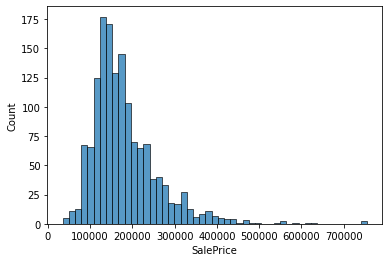

In [10]:
sns.histplot(data['SalePrice'])
print ("Skew is:", data.SalePrice.skew())

we can clearly see that the data is skewed. so now we perform log transformation to get rid of that skewness

Skew is: 0.12133506220520406


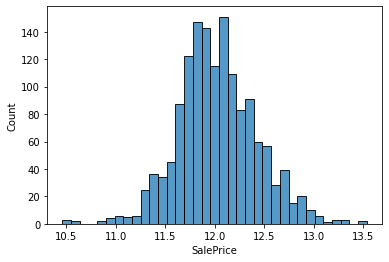

In [11]:
import numpy as np
target = np.log(data.SalePrice)
print ("Skew is:", target.skew())
sns.histplot(target)

In [12]:
n = pd.DataFrame(data.isnull().sum())

In [13]:
n

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [14]:
null_cols = n[n[0]>0]
null_cols

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


droping all the features which has more than 50% of NaN values

In [15]:
data = data.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)

In [16]:
n = pd.DataFrame(data.isnull().sum())

In [17]:
#this shows us the columns only with null values
null_cols = n[n[0]>0]
null_cols

,0
LotFrontage,259
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


Now, I'm gonna separate all the categorical and numerical values 

In [18]:
def collect_cat (data):
  list_cat = []
  list_num = []
  for x in data.columns:
    if data[x].dtype == 'O':
      list_cat.append(x)
    else:
      list_num.append(x)
  return list_cat,list_num

In [19]:
list_cat,list_num = collect_cat(data)
df1 = data[list_num]
df2 = data[list_cat]

In [20]:
print(list_num)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [21]:
print(list_cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


###3)Handling Null Values

Now, I'll handle the missing data in these features

lets start with the feature that is having most number of null values

In [22]:
df2['FireplaceQu'].isnull().sum()

690

In [23]:
df1['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

Here FireplaceQU means fireplace quality and Fireplaces shows us the # fireplaces. The FireplaceQu is null wherever there is 0 in Fireplaces.Because  how can we the quality without its existence

now I'll replace null values with NoFP

In [24]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')

now I'll handle remaining null values with mean, medain, mode imputation technique
mean for numerical
mode for categorical

In [25]:
def handle_null(data,list_cat,list_num):
  for list_cat in list_cat:
    data[list_cat] = data[list_cat].fillna(str(data[list_cat].mode()[0]))
  for list_num in list_num:
    data[list_num] = data[list_num].fillna((data[list_num]).dropna().median())
  return data

In [26]:
data = handle_null(data,list_cat,list_num)

In [27]:
nan = pd.DataFrame(data.isnull().sum())
nan = nan[nan[0]>0]
nan

,0


In [28]:
list_cat,list_num = collect_cat(data)
df1 = data[list_num]
df2 = data[list_cat]

In [29]:
print(list_num)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [30]:
print(list_cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


###4)Handling Categorical values

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [32]:
df2.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [33]:
df2.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [34]:
df2.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [35]:
data['LotShape'] = df2['LotShape'].replace({'Reg' :925, 'IR1':484, 'IR2':41, 'IR3':10})

In [36]:
df2.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [37]:
df2.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
df2.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [39]:
df2.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [40]:
df2.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [41]:
#bigger the family size higher the prize
data['BldgType'] = df2['BldgType'].replace({'1Fam': 1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})

In [42]:
df2.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [43]:
#more the number of floors higher the price
data['HouseStyle'] = df2['HouseStyle'].replace({'1Story':1, '1.5Unf':2, '1.5Fin':3, '2Story':4, '2.5Unf':5, '2.5Fin':6, 'SFoyer':7, 'SLvl':8})

In [44]:
df2.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [45]:
#higer the number hihger the price
data['RoofStyle'] = df2['RoofStyle'].replace({'Shed':1,'Flat':2,'Gabel':3,'Gambrel':4,'Hip':5,'Mansard':6})

In [46]:
df2.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [47]:
data.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [48]:
data['ExterQual'] = df2['ExterQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1})

In [49]:
data.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [50]:
df2.BsmtQual.value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [51]:
data['BsmtQual'] = df2['BsmtQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1})

In [52]:
df2.BsmtCond.value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [53]:
df2.BsmtFinType1.value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [54]:
data['BsmtFinType1'] = df2['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})

In [55]:
df2.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [56]:
data['BsmtExposure'] = df2['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1})

In [57]:
df2.BsmtFinType2.value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [58]:
df2.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [59]:
df2.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [60]:
data['HeatingQC'] = df2['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [61]:
df2.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [62]:
df2.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
df2.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [64]:
data['KitchenQual'] = df2['KitchenQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1})

In [65]:
df2.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [66]:
data['FireplaceQu'] = df2['FireplaceQu'].replace({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1})

In [67]:
df2.GarageFinish.value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [68]:
data['GarageFinish'] = df2['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1})

In [69]:
df2.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [70]:
df2.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [71]:
df2.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [72]:
list_drop = ['LandContour','ExterCond','PavedDrive','GarageCond','Electrical','MSZoning','CentralAir','Heating','BsmtFinType2','BsmtCond', 'RoofMatl','LandSlope','Utilities','LotConfig','Street']
data = data.drop(, axis=1)

In [73]:
data

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450.0,925,CollgCr,Norm,Norm,1,4,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,PConc,3,1,6,706.0,0.0,150.0,856.0,5,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,3,8,Typ,0,1,Attchd,2003.0,2,2,548.0,TA,0.0,61.0,0.0,0.0,0.0,0.0,0,2,2008,WD,Normal,208500
1,20,80.0,9600.0,925,Veenker,Feedr,Norm,1,1,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,2,CBlock,3,4,5,978.0,0.0,284.0,1262.0,5,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,2,6,Typ,1,4,Attchd,1976.0,2,2,460.0,TA,298.0,0.0,0.0,0.0,0.0,0.0,0,5,2007,WD,Normal,181500
2,60,68.0,11250.0,484,CollgCr,Norm,Norm,1,4,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,PConc,3,2,6,486.0,0.0,434.0,920.0,5,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,3,6,Typ,1,4,Attchd,2001.0,2,2,608.0,TA,0.0,42.0,0.0,0.0,0.0,0.0,0,9,2008,WD,Normal,223500
3,70,60.0,9550.0,484,Crawfor,Norm,Norm,1,4,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,BrkTil,2,1,5,216.0,0.0,540.0,756.0,4,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,3,7,Typ,1,5,Detchd,1998.0,1,3,642.0,TA,0.0,35.0,272.0,0.0,0.0,0.0,0,2,2006,WD,Abnorml,140000
4,60,84.0,14260.0,484,NoRidge,Norm,Norm,1,4,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,PConc,3,3,6,655.0,0.0,490.0,1145.0,5,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,3,9,Typ,1,4,Attchd,2000.0,2,3,836.0,TA,192.0,84.0,0.0,0.0,0.0,0.0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,925,Gilbert,Norm,Norm,1,4,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,2,PConc,3,1,1,0.0,0.0,953.0,953.0,5,953.0,694.0,0.0,1647.0,0,0,2,1,3,1,2,7,Typ,1,4,Attchd,1999.0,2,2,460.0,TA,0.0,40.0,0.0,0.0,0.0,0.0,0,8,2007,WD,Normal,175000
1456,20,85.0,13175.0,925,NWAmes,Norm,Norm,1,1,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,2,CBlock,3,1,5,790.0,163.0,589.0,1542.0,3,2073.0,0.0,0.0,2073.0,1,0,2,0,3,1,2,7,Min1,2,4,Attchd,1978.0,1,2,500.0,TA,349.0,0.0,0.0,0.0,0.0,0.0,0,2,2010,WD,Normal,210000
1457,70,66.0,9042.0,925,Crawfor,Norm,Norm,1,4,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,4,Stone,2,1,6,275.0,0.0,877.0,1152.0,5,1188.0,1152.0,0.0,2340.0,0,0,2,0,4,1,3,9,Typ,2,5,Attchd,1941.0,2,1,252.0,TA,0.0,60.0,0.0,0.0,0.0,0.0,2500,5,2010,WD,Normal,266500
1458,20,68.0,9717.0,925,NAmes,Norm,Norm,1,1,5,6,1950,1996,5,MetalSd,MetalSd,None,0.0,2,CBlock,2,2,6,49.0,1029.0,0.0,1078.0,4,1078.0,0.0,0.0,1078.0,1,0,1,0,2,1,3,5,Typ,0,1,Attchd,1950.0,1,1,240.0,TA,366.0,0.0,112.0,0.0,0.0,0.0,0,4,2010,WD,Normal,142125


In [74]:
list_cat_,list_num_ = collect_cat(data)
df3 = data[list_num_]
df4 = data[list_cat_]

In [75]:
def handle_cat(data,list_cat_):
  for c in list_cat_:
    if len(data[c].unique()) > 10:
      n = list(data[c].value_counts().index)[11:]
      data[c] = data[c].replace(n,'others')
  return data

In [76]:
data = handle_cat(data, list_cat_)

###5)Handling skewness and Outliers

In [77]:
from scipy.stats import skew

In [78]:
list_flt = [feature for feature in data.columns if data[feature].dtype == 'float64' ]

skewed_feats = data[list_flt].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

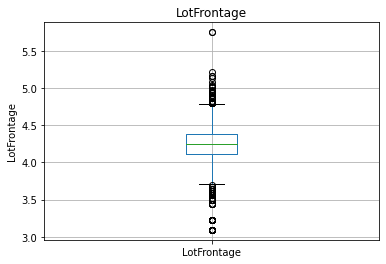

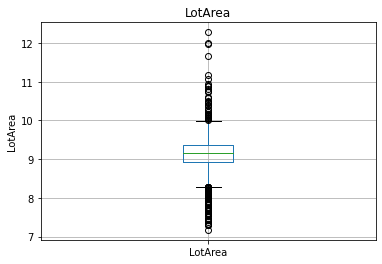

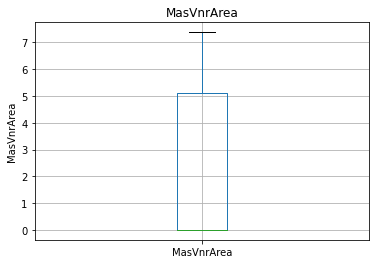

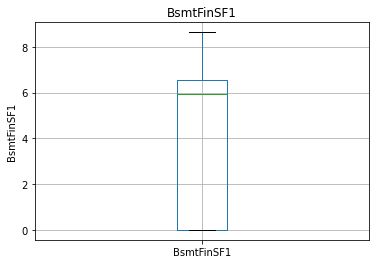

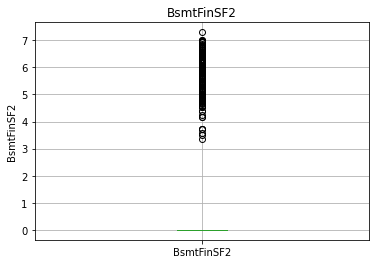

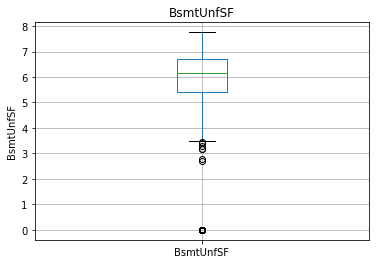

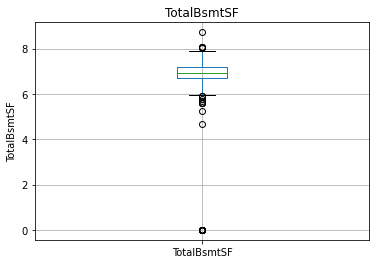

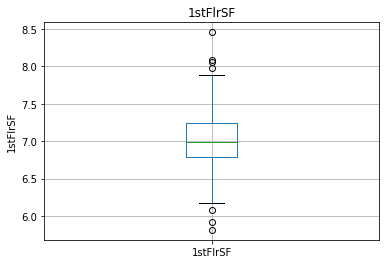

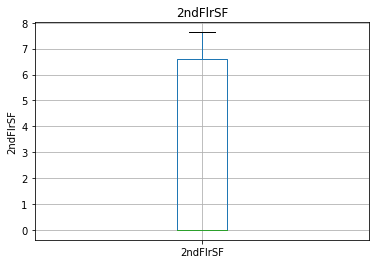

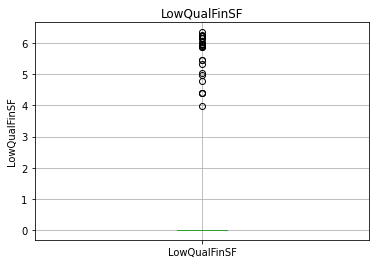

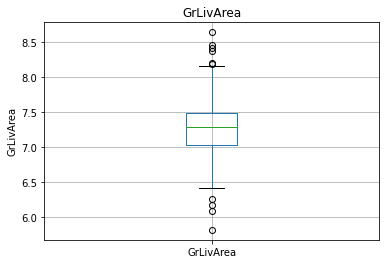

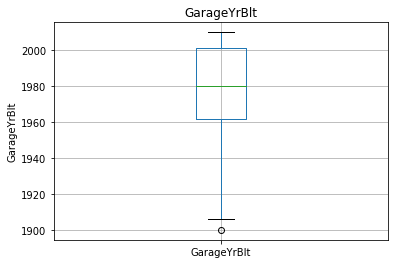

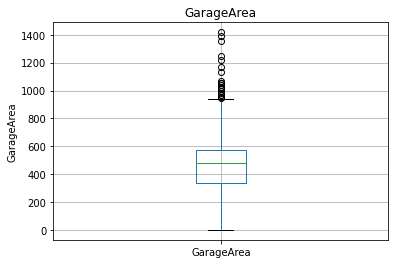

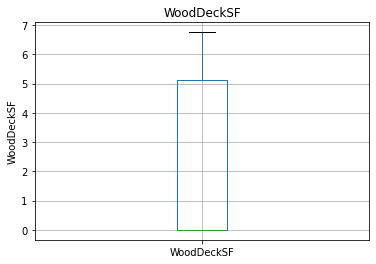

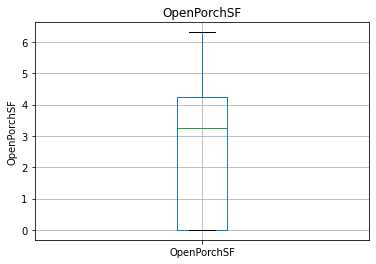

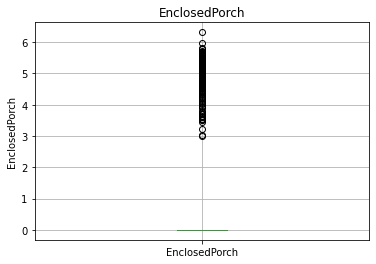

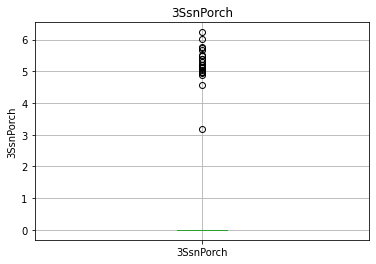

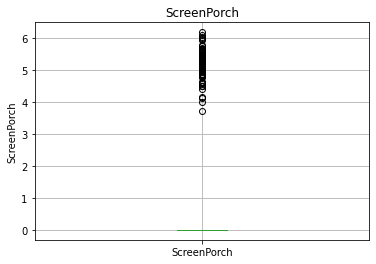

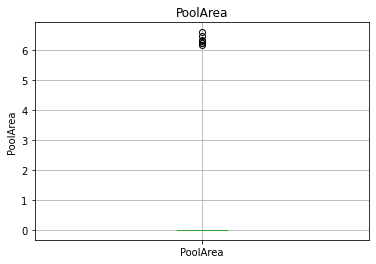

In [80]:
#ploting the outliers
for feature in list_flt:
  data.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

we are using IQR to handle outliers 

steps:
1.   Arrange the data in increasing order 
2.   Calculate first-q1 and third-q3 quartiles
3.   Find Inter Quartile Range (q1-q3)
4.   Find lower(q1 - iqr * 1.5) and upper(q3 - iqr * 1.5) bounds. 

     Anything that lies outside these bounds are considered as outliers



In [81]:
import numpy as np

In [82]:
outliers = [x for x in list_flt if x not in ['PoolArea','OpenPorchSF', 'ScreenPorch', '3SsnPorch','EnclosedPorch','LowQualFinSF','BsmtFinSF2'] ]

for feature in outliers:
    q1, q3 = np.percentile(data[feature], [25, 75])
    iqr = q3-q1
    lb = q1-(iqr*1.5)
    ub = q3+(iqr*1.5)
    data.loc[data[feature] >= ub, feature] = ub
    data.loc[data[feature] <= lb, feature] = lb

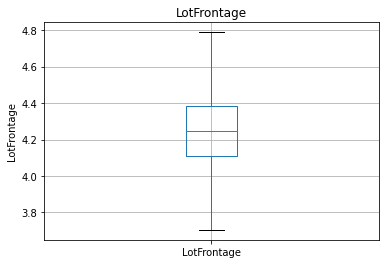

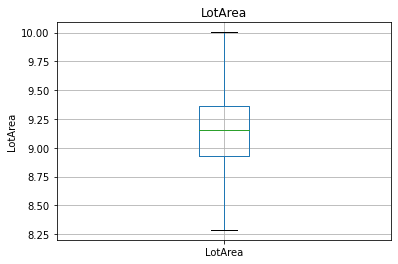

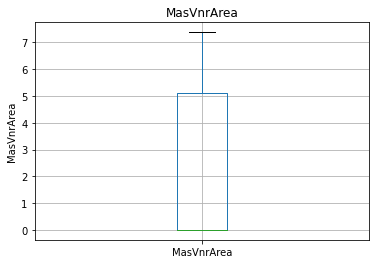

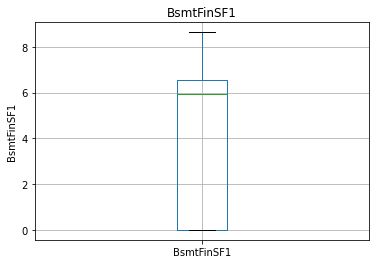

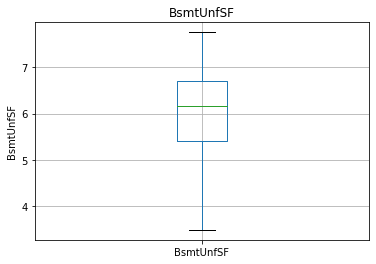

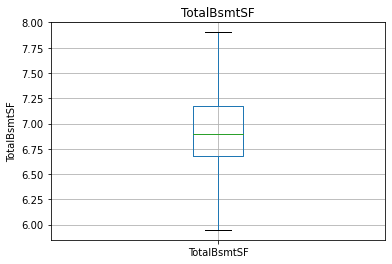

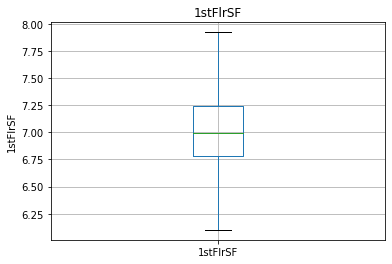

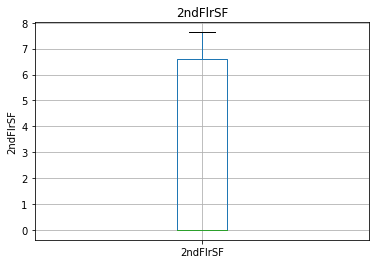

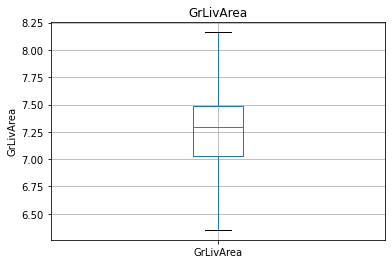

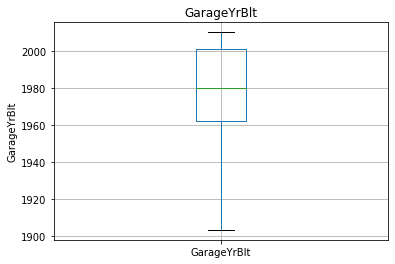

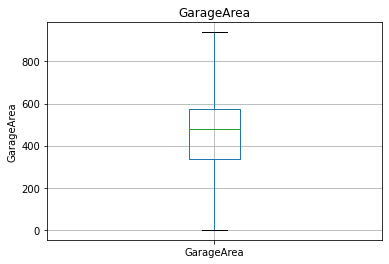

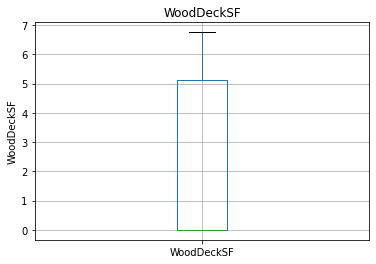

In [83]:
for feature in outliers:
  data.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [84]:
data_train = pd.get_dummies(data,drop_first=True)
data_train

,MSSubClass,LotFrontage,LotArea,LotShape,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.189655,9.042040,925,1,4,7,5,2003,2003,5.283204,3,3,1,6,6.561031,0.000000,5.017280,6.753438,5,6.753438,6.751101,0.0,7.444833,1,0,2,1,3,1,3,8,0,1,2003.0,2,2,548.0,0.000000,4.127134,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,4.394449,9.169623,925,1,1,6,8,1976,1976,0.000000,2,3,4,5,6.886532,0.000000,5.652489,7.141245,5,7.141245,0.000000,0.0,7.141245,0,1,2,0,3,1,2,6,1,4,1976.0,2,2,460.0,5.700444,0.000000,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,4.234107,9.328212,484,1,4,7,5,2001,2002,5.093750,3,3,2,6,6.188264,0.000000,6.075346,6.825460,5,6.825460,6.765039,0.0,7.488294,1,0,2,1,3,1,3,6,1,4,2001.0,2,2,608.0,0.000000,3.761200,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,4.110874,9.164401,484,1,4,7,5,1915,1970,0.000000,2,2,1,5,5.379897,0.000000,6.293419,6.629363,4,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,3,7,1,5,1998.0,1,3,642.0,0.000000,3.583519,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,4.442651,9.565284,484,1,4,8,5,2000,2000,5.860786,3,3,3,6,6.486161,0.000000,6.196444,7.044033,5,7.044033,6.960348,0.0,7.695758,1,0,2,1,4,1,3,9,1,4,2000.0,2,3,836.0,5.262690,4.442651,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4.143135,8.976894,925,1,4,6,5,1999,2000,0.000000,2,3,1,1,0.000000,0.000000,6.860664,6.860664,5,6.860664,6.543912,0.0,7.407318,0,0,2,1,3,1,2,7,1,4,1999.0,2,2,460.0,0.000000,3.713572,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,4.454347,9.486152,925,1,1,6,6,1978,1988,4.787492,2,3,1,5,6.673298,5.099866,6.380123,7.341484,3,7.637234,0.000000,0.0,7.637234,1,0,2,0,3,1,2,7,2,4,1978.0,1,2,500.0,5.857933,0.000000,...,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,70,4.204693,9.109746,925,1,4,7,9,1941,2006,0.000000,4,2,1,6,5.620401,0.000000,6.777647,7.050123,5,7.080868,7.050123,0.0,7.758333,0,0,2,0,4,1,3,9,2,5,1941.0,2,1,252.0,0.000000,4.110874,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,20,4.234107,9.181735,925,1,1,5,6,1950,1996,0.000000,2,2,2,6,3.912023,6.937314,3.485417,6.983790,4,6.983790,0.000000,0.0,6.983790,1,0,1,0,2,1,3,5,0,1,1950.0,1,1,240.0,5.905362,0.000000,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


###6)Feature selection

In [85]:
#droping the features with low variance

from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0.1)
var.fit(data_train)

VarianceThreshold(threshold=0.1)

In [86]:
var.get_support() # this method returns false that has variance less than the given threshold

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [87]:
cont_col = [col for col in data_train.columns if col not in data_train.columns[var.get_support()]]
cont_col

['LotFrontage',
 '1stFlrSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'RoofStyle_2',
 'RoofStyle_4',
 'RoofStyle_6',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior1st_others',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'Exterior2nd_others',
 'MasVnrType_Stone',
 'Foundation_Slab',
 'Foundatio

In [88]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [89]:
data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [90]:
data.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [91]:
data.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

we can clearly see there is no internal variation in these features and these cannot add that value to the model

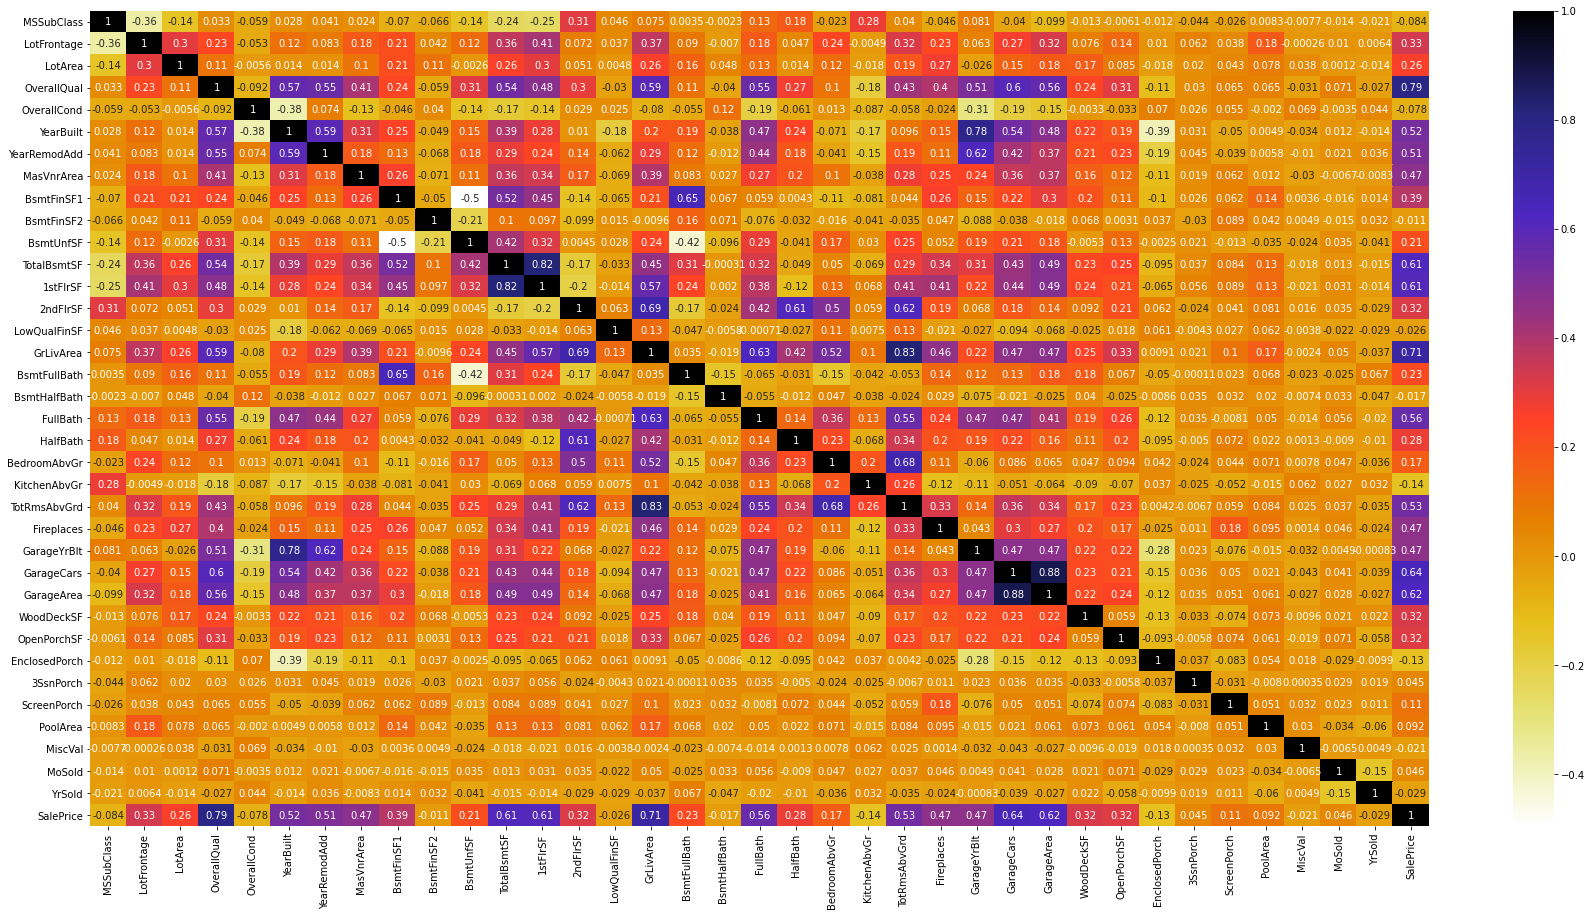

In [92]:
#droping the features that are less realaive to target varible and highly related to other features

plt.figure(figsize=(30,15))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [93]:
#this function will return us the columns with high correlation with other columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns) - 1):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [94]:
corr_features = correlation(df1, 0.80)
set(corr_features)

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

these are the features that are highly correlated with other feature columns

In [95]:
#this function will return the columns that are less relate with target variable
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, -1]) < threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [96]:
tar_corr_features = correlation(df1, 0.20)
set(tar_corr_features)

{'3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'EnclosedPorch',
 'KitchenAbvGr',
 'LowQualFinSF',
 'MSSubClass',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'PoolArea',
 'ScreenPorch',
 'YrSold'}

In [104]:
from sklearn.preprocessing import LabelEncoder
df5 = df2.copy()
lbl = LabelEncoder()
for feature in df2.columns:
  df5[feature] = lbl.fit_transform(df2[feature])


In [105]:
df5

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,3,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,5,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,5,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,5,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,3,1,2,4,4,2,8,4


In [106]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df5,y)

In [155]:
p_values=pd.DataFrame(f_p_values[1], index=df5.columns, columns=['p_values'])
df6 = p_values[p_values.p_values <= 0.05]
temp = np.array(df6.index)

In [162]:
temp

array(['LotShape', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Exterior2nd', 'BsmtFinType1', 'HeatingQC'], dtype=object)

In [171]:
ft_rem = ['GarageType', 'Functional', 'MasVnrType', 'Condition1', 'Condition2', 'SaleType', 
          'SaleCondition', 'Neighborhood', 'GarageQual', 'Exterior1st', 'Exterior2nd', 'LotFrontage',
          '1stFlrSF','BsmtHalfBath','KitchenAbvGr','Foundation','RoofStyle','LotShape', 
          'Neighborhood', 'BldgType', 'HouseStyle','Exterior2nd', 'BsmtFinType1',
          'HeatingQC','3SsnPorch','BedroomAbvGr','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','KitchenAbvGr',
          'LowQualFinSF','MSSubClass','MiscVal','MoSold','OverallCond','PoolArea','ScreenPorch','YrSold', 
          '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd']

In [174]:
new_data = data.drop(ft_rem, axis=1)

In [175]:
data_train = pd.get_dummies(new_data, drop_first=True)

In [181]:
data_train

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,9.042040,7,2003,2003,5.283204,3,3,1,6.561031,5.017280,6.753438,6.751101,7.444833,1,2,1,3,0,1,2003.0,2,2,0.000000,4.127134,208500
1,9.169623,6,1976,1976,0.000000,2,3,4,6.886532,5.652489,7.141245,0.000000,7.141245,0,2,0,2,1,4,1976.0,2,2,5.700444,0.000000,181500
2,9.328212,7,2001,2002,5.093750,3,3,2,6.188264,6.075346,6.825460,6.765039,7.488294,1,2,1,3,1,4,2001.0,2,2,0.000000,3.761200,223500
3,9.164401,7,1915,1970,0.000000,2,2,1,5.379897,6.293419,6.629363,6.629363,7.448916,1,1,0,3,1,5,1998.0,1,3,0.000000,3.583519,140000
4,9.565284,8,2000,2000,5.860786,3,3,3,6.486161,6.196444,7.044033,6.960348,7.695758,1,2,1,3,1,4,2000.0,2,3,5.262690,4.442651,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.976894,6,1999,2000,0.000000,2,3,1,0.000000,6.860664,6.860664,6.543912,7.407318,0,2,1,2,1,4,1999.0,2,2,0.000000,3.713572,175000
1456,9.486152,6,1978,1988,4.787492,2,3,1,6.673298,6.380123,7.341484,0.000000,7.637234,1,2,0,2,2,4,1978.0,1,2,5.857933,0.000000,210000
1457,9.109746,7,1941,2006,0.000000,4,2,1,5.620401,6.777647,7.050123,7.050123,7.758333,0,2,0,3,2,5,1941.0,2,1,0.000000,4.110874,266500
1458,9.181735,5,1950,1996,0.000000,2,2,2,3.912023,3.485417,6.983790,0.000000,6.983790,1,1,0,3,0,1,1950.0,1,1,5.905362,0.000000,142125


##Splitting the data

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train,  y_test = train_test_split(data_train.drop(['SalePrice'], axis=1), y, test_size=0.3, random_state=42)

##Building the model

In [178]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [179]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [180]:
xgb_grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   18.7s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [182]:
var = pd.DataFrame(xgb_grid.cv_results_)

In [183]:
var

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_silent,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.648208,0.073285,0.060672,0.000062,0.7,0.03,5,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.808535,0.886721,0.847628,0.039093,2
1,4.182867,0.233146,0.064580,0.015327,0.7,0.03,6,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.808184,0.889248,0.848716,0.040532,1
2,4.923009,0.411170,0.085574,0.011447,0.7,0.03,7,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.805279,0.887481,0.846380,0.041101,3
3,3.288033,0.111488,0.068842,0.015512,0.7,0.05,5,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.808066,0.879461,0.843764,0.035697,5
4,4.374924,0.003800,0.036967,0.002464,0.7,0.05,6,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.804117,0.883781,0.843949,0.039832,4
5,4.959506,0.081971,0.062066,0.017862,0.7,0.05,7,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.802351,0.880188,0.841270,0.038919,6
6,3.824817,0.115478,0.066428,0.001524,0.7,0.07,5,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.800025,0.871846,0.835935,0.035910,9
7,3.568692,0.570565,0.030409,0.006373,0.7,0.07,6,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.801577,0.878951,0.840264,0.038687,7
8,3.207251,0.023246,0.017699,0.004755,0.7,0.07,7,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.799699,0.876517,0.838108,0.038409,8


In [184]:
xgb_grid.best_score_

0.8487160379375727

In [185]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [186]:
xgb1 = XGBRegressor(max_depth='6',learning_rate='0.03',n_estimators=500,min_child_weight=4,silent=1,subsample=0.7,nthread=4,colsample_bytree='0.7',objective='reg:linear')

In [187]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree='0.7', gamma=0,
             importance_type='gain', learning_rate='0.03', max_delta_step=0,
             max_depth='6', min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

##Evaluating the model

In [188]:
predictions = xgb1.predict(x_test)

In [190]:
print(r2_score(y_test, predictions))

0.9139890661172239
